## QUESTION-1

Demonstrating CLT for Uniform Distribution


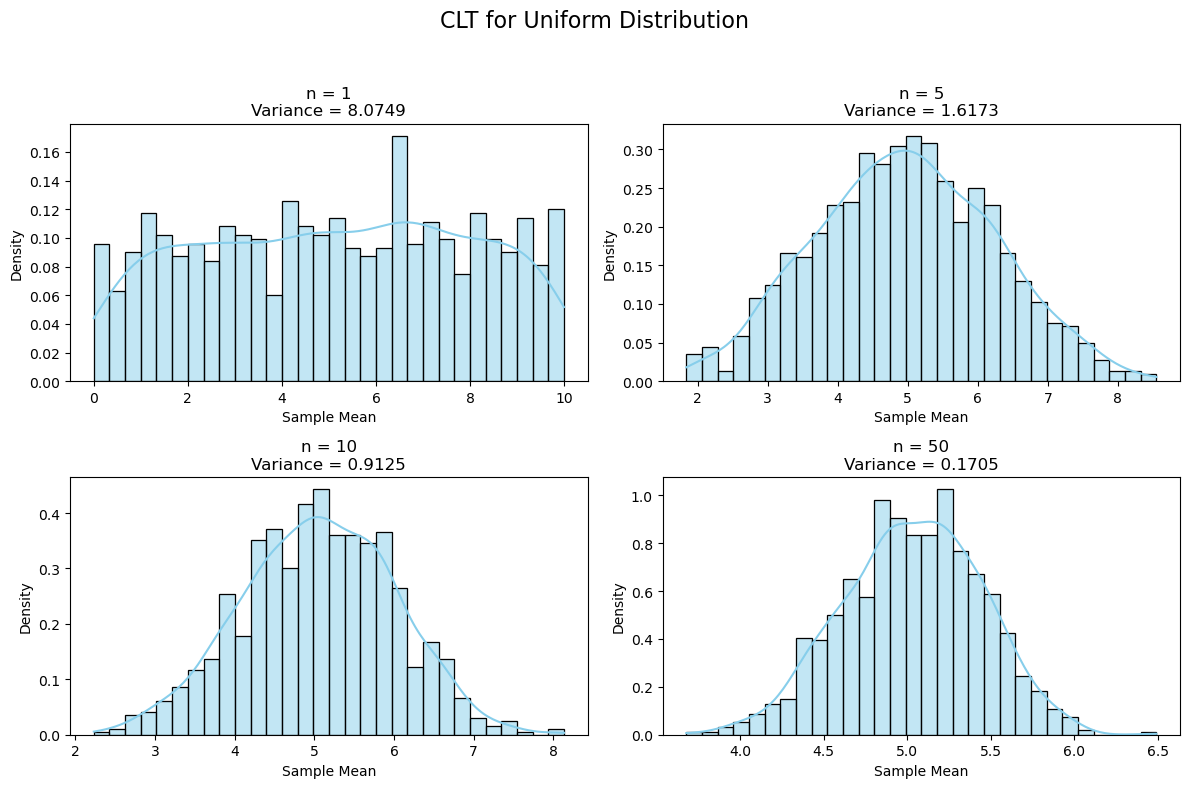

Demonstrating CLT for Normal Distribution


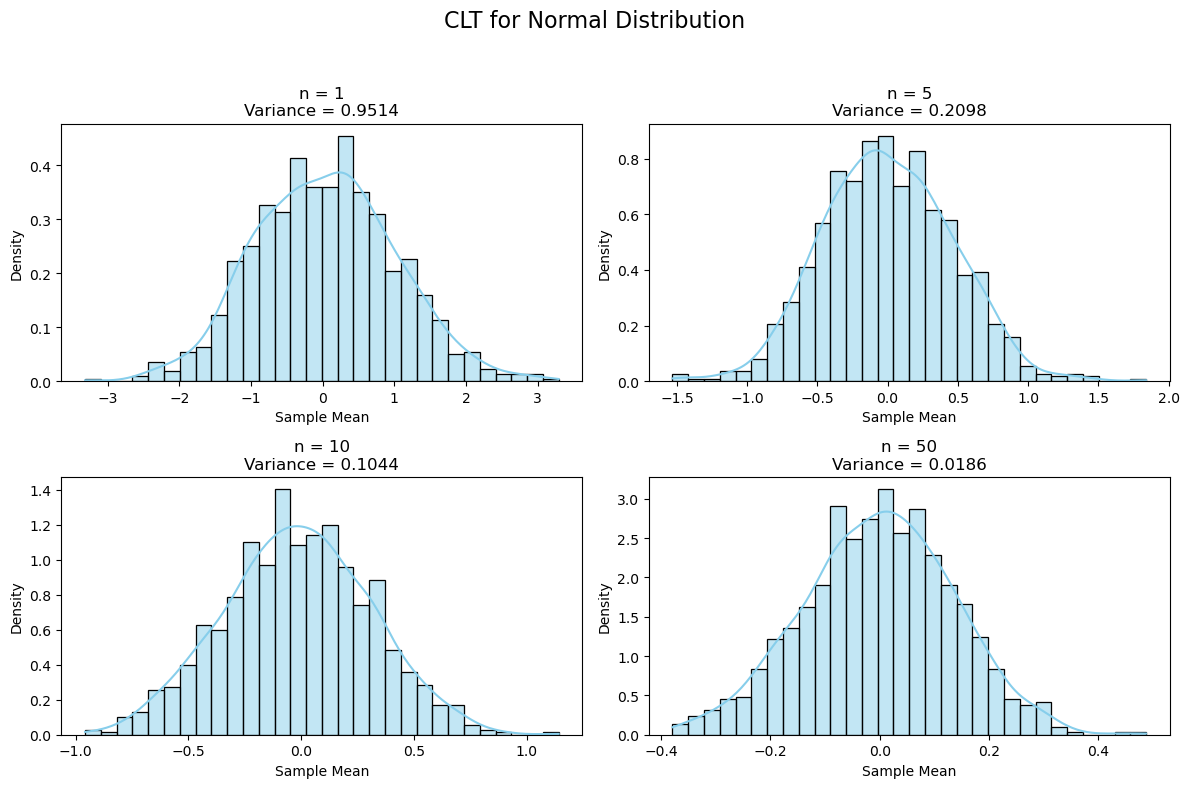

Demonstrating CLT for Exponential Distribution


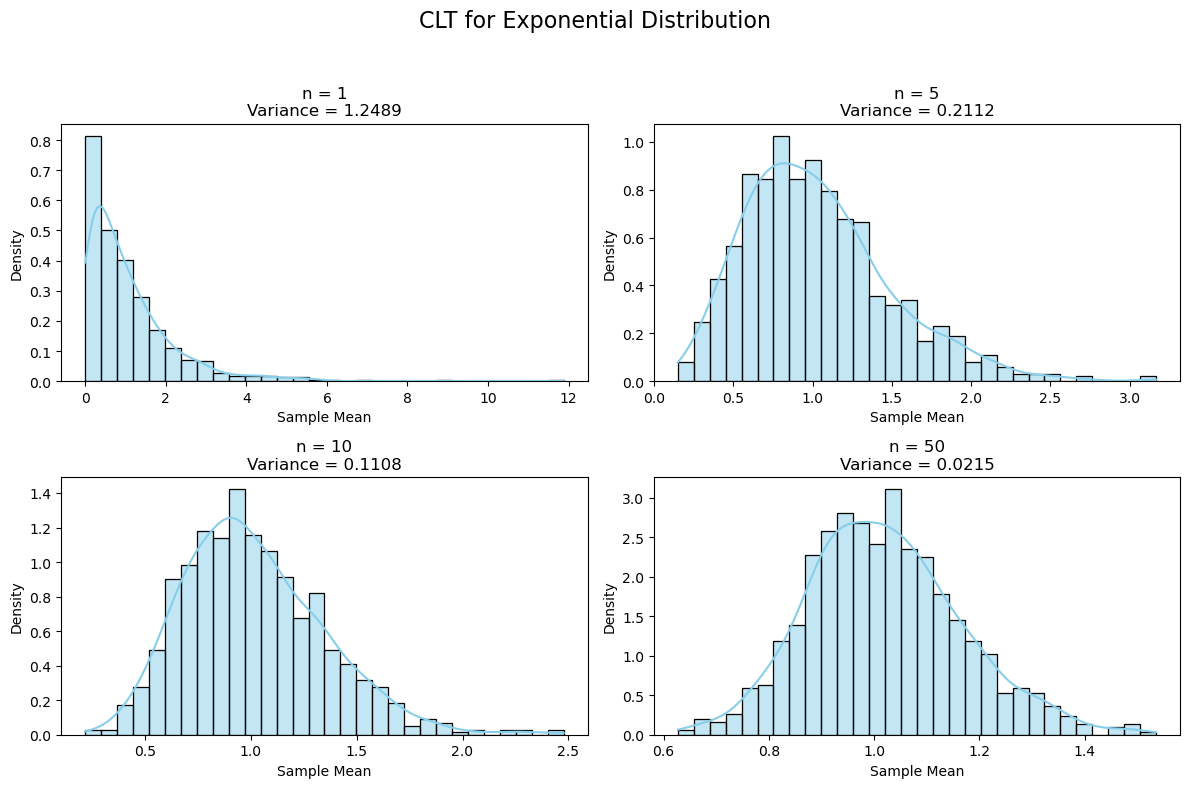

Investigating Uniform Distribution


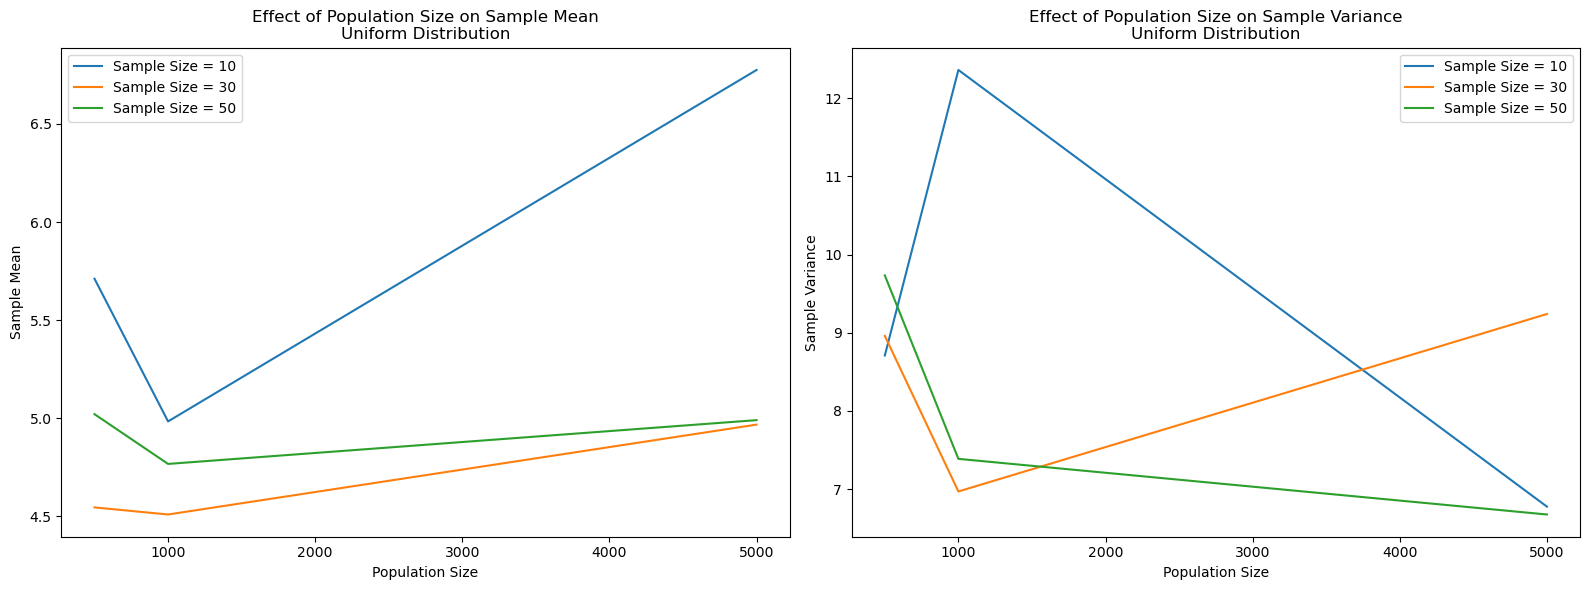

Investigating Normal Distribution


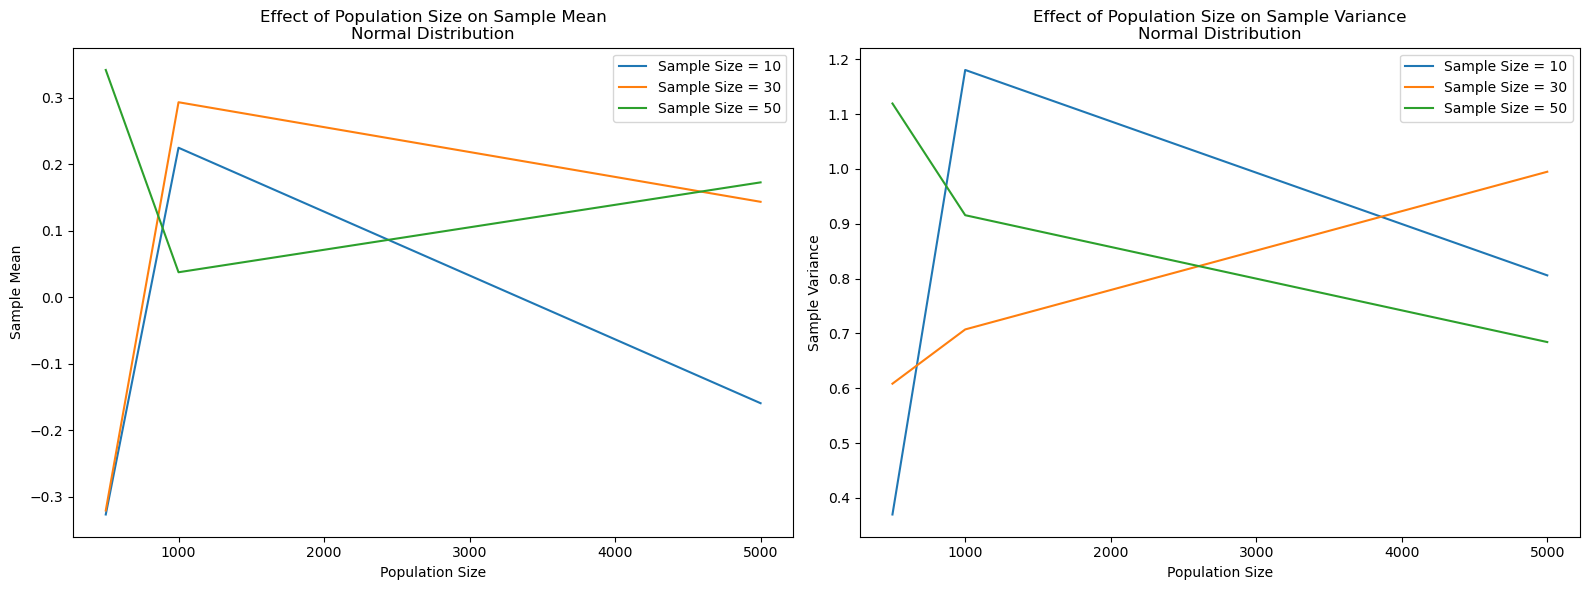

Investigating Exponential Distribution


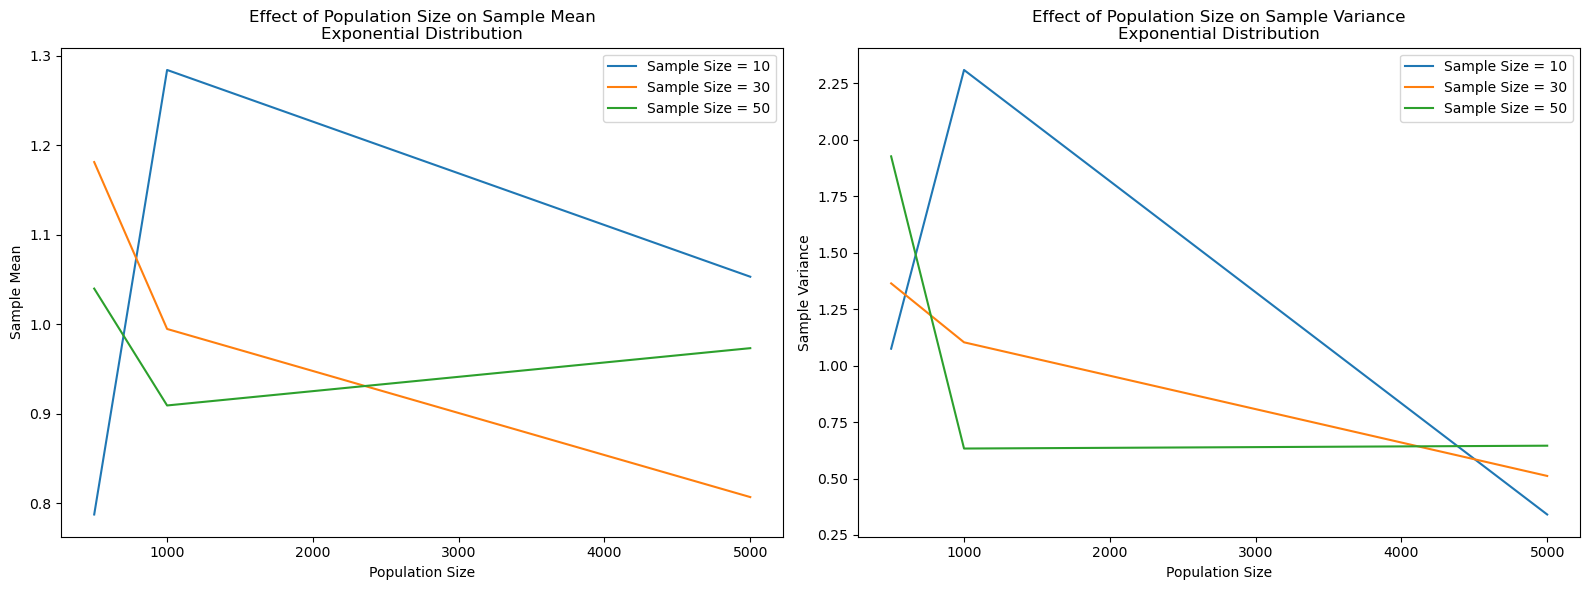

Effect of Skewness for Uniform Distribution


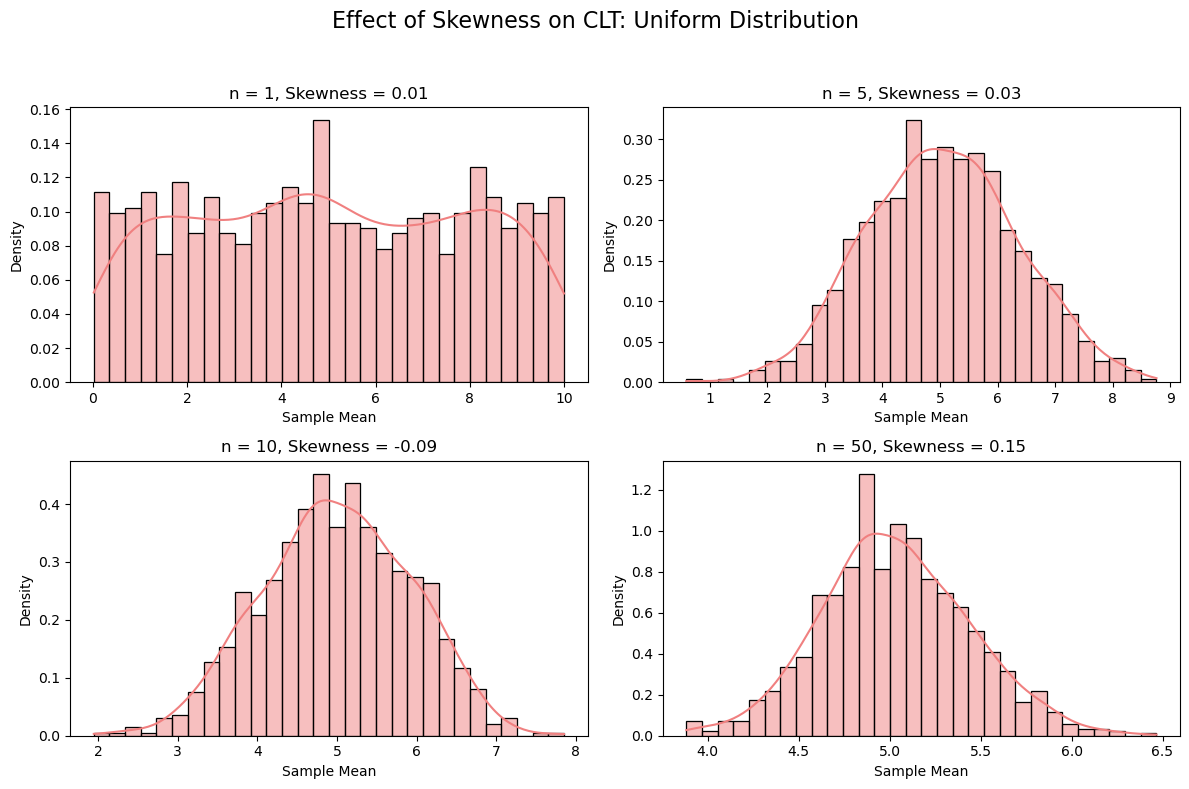

Effect of Skewness for Normal Distribution


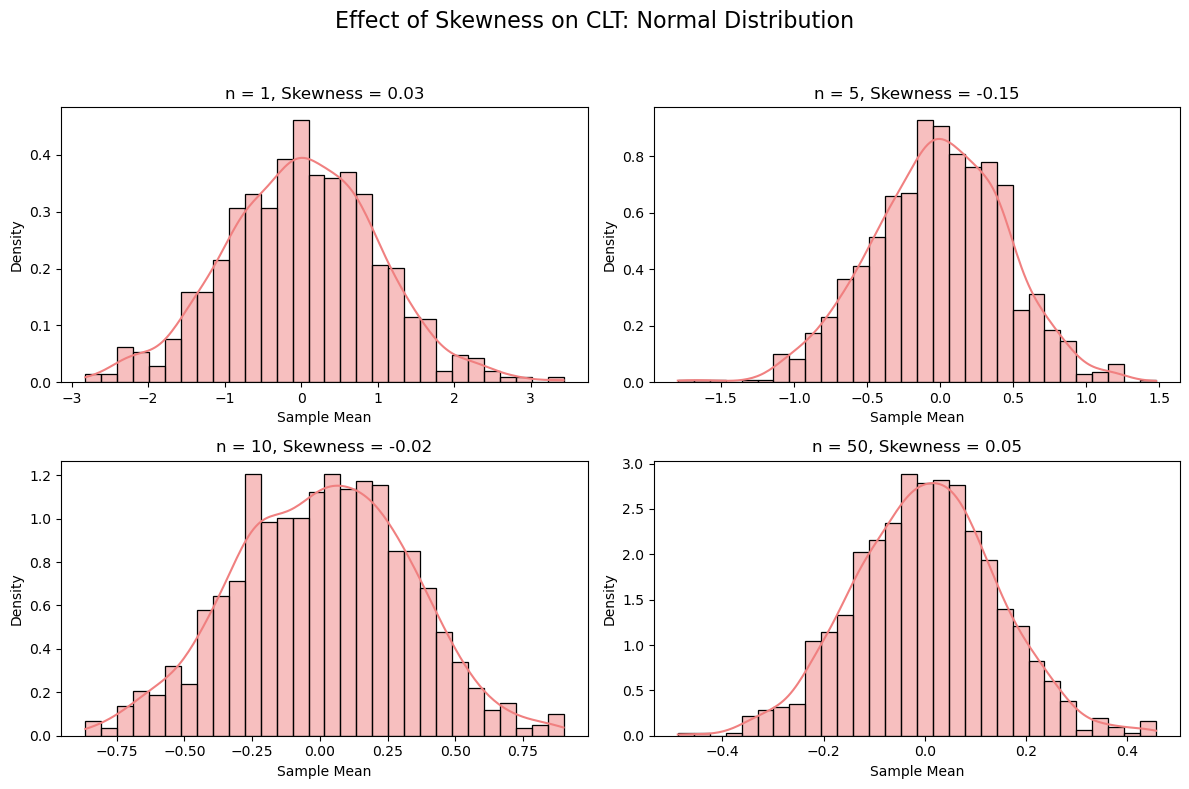

Effect of Skewness for Exponential Distribution


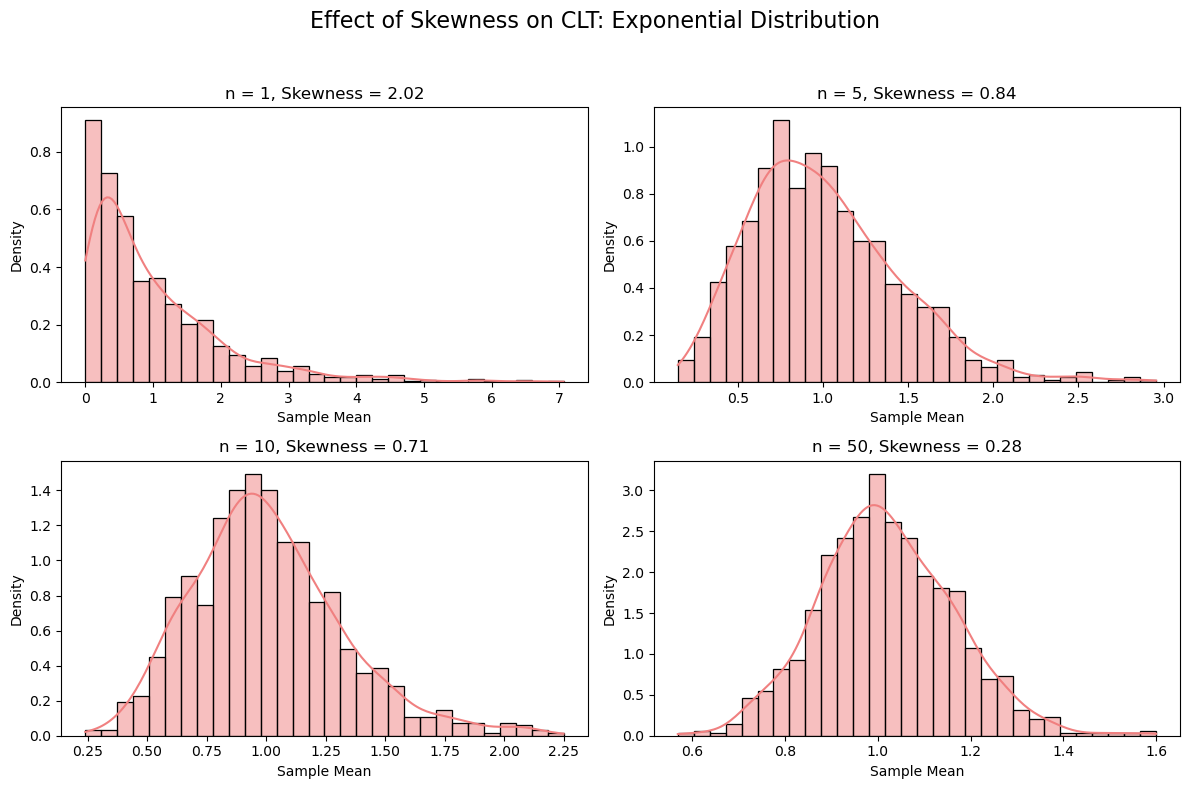

[(1, 2.0231441787149897),
 (5, 0.8381871311773895),
 (10, 0.7134145394310331),
 (50, 0.28128737798964354)]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, norm, expon, skew

# Parameters for the distributions
# Uniform Distribution
a, b = 0, 10  # Lower and upper bounds
N = 10000  # Population size for uniform distribution

# Normal Distribution
mu_normal, sigma_normal = 0, 1  # Mean and standard deviation
N_normal = 10000  # Population size for normal distribution

# Exponential Distribution
lambda_exp = 1  # Rate parameter
N_exp = 10000  # Population size for exponential distribution

# Generating populations
uniform_population = uniform.rvs(loc=a, scale=(b - a), size=N)
normal_population = norm.rvs(loc=mu_normal, scale=sigma_normal, size=N_normal)
exponential_population = expon.rvs(scale=1 / lambda_exp, size=N_exp)

# Sampling and demonstrating CLT
def demonstrate_clt(population, sample_sizes, num_samples=1000, title=""):
    plt.figure(figsize=(12, 8))
    for i, n in enumerate(sample_sizes):
        # Generate sample means
        sample_means = [np.mean(np.random.choice(population, size=n, replace=False)) for _ in range(num_samples)]
        # Calculate the variance of the sample means
        sample_variance = np.var(sample_means, ddof=1)
        
        # Plot histogram
        plt.subplot(2, len(sample_sizes) // 2, i + 1)
        sns.histplot(sample_means, kde=True, stat="density", bins=30, color="skyblue")
        plt.title(f"n = {n}\nVariance = {sample_variance:.4f}")
        plt.xlabel("Sample Mean")
        plt.ylabel("Density")
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# Sample sizes to test
sample_sizes = [1,5, 10, 50]

# Uniform Distribution CLT
print("Demonstrating CLT for Uniform Distribution")
demonstrate_clt(uniform_population, sample_sizes, title="CLT for Uniform Distribution")

# Normal Distribution CLT
print("Demonstrating CLT for Normal Distribution")
demonstrate_clt(normal_population, sample_sizes, title="CLT for Normal Distribution")

# Exponential Distribution CLT
print("Demonstrating CLT for Exponential Distribution")
demonstrate_clt(exponential_population, sample_sizes, title="CLT for Exponential Distribution")

# Investigating influence of population size and sample size on sample mean and variance
def investigate_population_and_sample_size(population, population_sizes, sample_sizes, title=""):
    results = []
    for pop_size in population_sizes:
        for samp_size in sample_sizes:
            pop_sample = np.random.choice(population, size=pop_size, replace=False)
            sample = np.random.choice(pop_sample, size=samp_size, replace=False)
            sample_mean = np.mean(sample)
            sample_variance = np.var(sample, ddof=1)
            results.append((pop_size, samp_size, sample_mean, sample_variance))

    # Convert results to a structured array for better visualization
    results = np.array(results, dtype=[('Population Size', 'i4'), ('Sample Size', 'i4'), ('Sample Mean', 'f4'), ('Sample Variance', 'f4')])

    # Plot results
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot sample mean vs population and sample sizes
    for samp_size in sample_sizes:
        means = [r['Sample Mean'] for r in results if r['Sample Size'] == samp_size]
        pop_sizes = [r['Population Size'] for r in results if r['Sample Size'] == samp_size]
        axes[0].plot(pop_sizes, means, label=f'Sample Size = {samp_size}')
    axes[0].set_title(f"Effect of Population Size on Sample Mean\n{title}")
    axes[0].set_xlabel("Population Size")
    axes[0].set_ylabel("Sample Mean")
    axes[0].legend()

    # Plot sample variance vs population and sample sizes
    for samp_size in sample_sizes:
        variances = [r['Sample Variance'] for r in results if r['Sample Size'] == samp_size]
        pop_sizes = [r['Population Size'] for r in results if r['Sample Size'] == samp_size]
        axes[1].plot(pop_sizes, variances, label=f'Sample Size = {samp_size}')
    axes[1].set_title(f"Effect of Population Size on Sample Variance\n{title}")
    axes[1].set_xlabel("Population Size")
    axes[1].set_ylabel("Sample Variance")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Population sizes and sample sizes to investigate
population_sizes = [500, 1000, 5000]
sample_sizes_to_investigate = [10, 30, 50]

# Investigate for Uniform Distribution
print("Investigating Uniform Distribution")
investigate_population_and_sample_size(uniform_population, population_sizes, sample_sizes_to_investigate, title="Uniform Distribution")

# Investigate for Normal Distribution
print("Investigating Normal Distribution")
investigate_population_and_sample_size(normal_population, population_sizes, sample_sizes_to_investigate, title="Normal Distribution")

# Investigate for Exponential Distribution
print("Investigating Exponential Distribution")
investigate_population_and_sample_size(exponential_population, population_sizes, sample_sizes_to_investigate, title="Exponential Distribution")

# Effect of Skewness on CLT
def effect_of_skewness_on_clt(population, sample_sizes, num_samples=1000, title=""):
    skewness_results = []
    plt.figure(figsize=(12, 8))
    for i, n in enumerate(sample_sizes):
        sample_means = [np.mean(np.random.choice(population, size=n, replace=False)) for _ in range(num_samples)]
        sample_skewness = skew(sample_means)
        skewness_results.append((n, sample_skewness))
        plt.subplot(2, len(sample_sizes) // 2, i + 1)
        sns.histplot(sample_means, kde=True, stat="density", bins=30, color="lightcoral")
        plt.title(f"n = {n}, Skewness = {sample_skewness:.2f}")
        plt.xlabel("Sample Mean")
        plt.ylabel("Density")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    return skewness_results

# Analyze skewness for Uniform Distribution
print("Effect of Skewness for Uniform Distribution")
effect_of_skewness_on_clt(uniform_population, sample_sizes, title="Effect of Skewness on CLT: Uniform Distribution")

# Analyze skewness for Normal Distribution
print("Effect of Skewness for Normal Distribution")
effect_of_skewness_on_clt(normal_population, sample_sizes, title="Effect of Skewness on CLT: Normal Distribution")

# Analyze skewness for Exponential Distribution
print("Effect of Skewness for Exponential Distribution")
effect_of_skewness_on_clt(exponential_population, sample_sizes, title="Effect of Skewness on CLT: Exponential Distribution")
